In [ ]:
#!pip list

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [2]:
#internally it is using generator concept which is there in python

train_ds = keras.utils.image_dataset_from_directory(
    directory=r'C:\Users\mpapp\Desktop\ineuron\project\try_deep_learning\CNN\archive\dogs_vs_cats\train',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=r'C:\Users\mpapp\Desktop\ineuron\project\try_deep_learning\CNN\archive\dogs_vs_cats\test',
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
# for i in train_ds:
#     print(i)

In [5]:
def process(image,label):
    tf.cast(image/255.,tf.float32)
    return image,label
train_df = train_ds.map(process)
validation_df = validation_ds.map(process)

In [6]:
model = Sequential()

In [7]:
#first convolution
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convolution
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and relu activation
model.add(Dense(128,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))

#here we have 1 o/p since it is a binary classification
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(train_df,epochs=2,validation_data=validation_df)

Epoch 1/2
625/625 [==============================] - 1665s 3s/step - loss: 2.1002 - accuracy: 0.5606 - val_loss: 0.6792 - val_accuracy: 0.5694
Epoch 2/2
625/625 [==============================] - 1755s 3s/step - loss: 0.6509 - accuracy: 0.6186 - val_loss: 0.6680 - val_accuracy: 0.6156


In [12]:
import matplotlib.pyplot as plt

In [50]:
dog_img=plt.imread(r'C:\Users\mpapp\Desktop\ineuron\project\try_deep_learning\CNN\cat-dog-image\dog1.jpg')

In [51]:
cat_img=plt.imread(r'C:\Users\mpapp\Desktop\ineuron\project\try_deep_learning\CNN\cat-dog-image\cat1.jpg')

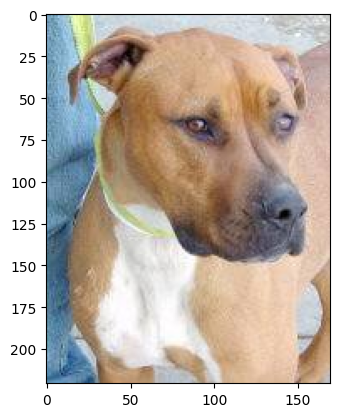

In [52]:
plt.imshow(dog_img)

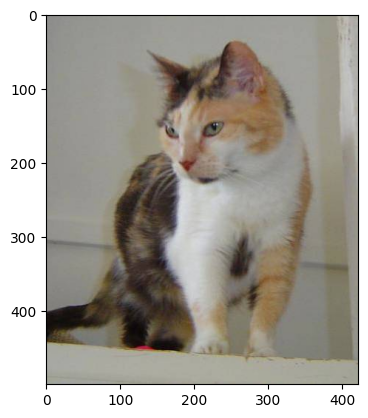

In [53]:
plt.imshow(cat_img)

In [54]:
cat_img.shape

(500, 422, 3)

In [55]:
dog_img.shape

(221, 170, 3)

In [56]:
import cv2
dog_resize=cv2.resize(dog_img,(256,256))
cat_resize=cv2.resize(cat_img,(256,256))

In [57]:
dog_resize.shape, cat_resize.shape

((256, 256, 3), (256, 256, 3))

In [58]:
dog_resize=dog_resize.reshape((1,256,256,3))
cat_resize=cat_resize.reshape((1,256,256,3))
dog_resize.shape, cat_resize.shape

((1, 256, 256, 3), (1, 256, 256, 3))

In [59]:
model.predict(dog_resize)

1/1 [==============================] - 0s 45ms/step


array([[0.7536158]], dtype=float32)

In [60]:
model.predict(cat_resize)

1/1 [==============================] - 0s 44ms/step


array([[0.29456085]], dtype=float32)